In [1]:
import pandas as pd
import numpy as np
import wget

In [3]:
data = 'https://github.com/vasilisbaltas/ML-Zoomcamp-2-Linear-Regression/blob/master/data.csv'

In [7]:
!curl -LJO https://github.com/vasilisbaltas/ML-Zoomcamp-2-Linear-Regression/raw/master/data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  3 1440k    3 49152    0     0  32482      0  0:00:45  0:00:01  0:00:44 32482
100 1440k  100 1440k    0     0   593k      0  0:00:02  0:00:02 --:--:-- 1525k


In [2]:
df = pd.read_csv('data.csv')

In [45]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [3]:
# bring column names into a more suitable form
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [5]:
# obtain the string columns
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

## EXPLORATORY DATA ANALYSIS

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of price

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

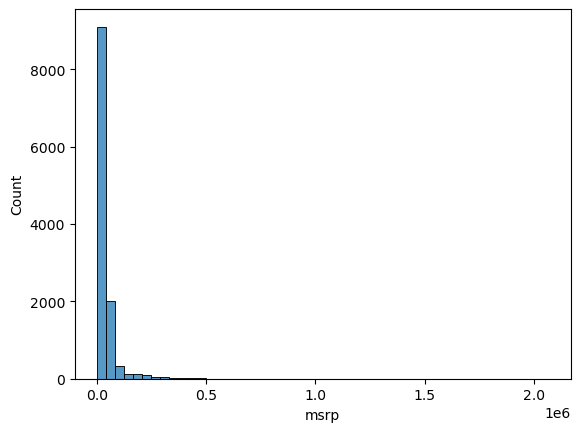

In [17]:
sns.histplot(df.msrp, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

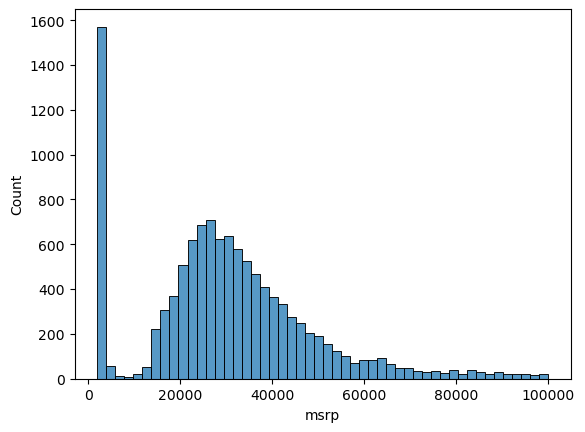

In [18]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)

In [9]:
price_logs = np.log1p(df.msrp)

In [10]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

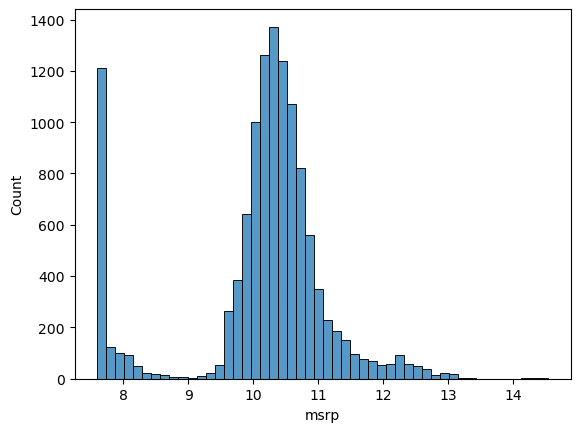

In [21]:
sns.histplot(price_logs, bins=50)

### Missing values

In [11]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [12]:
df.columns[df.isna().any()]

Index(['engine_fuel_type', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'market_category'],
      dtype='object')

## Setting up the Validation Framework

In [13]:
n = len(df)
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = n - n_val - n_test

In [14]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [ ]:
# however we need to shuffle our dataset because there is a sequential logic in the dataset (in car brand column)

In [15]:
np.random.seed(32)
idx = np.arange(n)

In [16]:
np.random.shuffle(idx)

In [17]:
idx[n_train:]

array([10617,  7765,  9618, ...,  9526,  9771, 10967])

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val   = df.iloc[idx[n_train:n_train + n_val]]
df_test  = df.iloc[idx[n_train+n_val:]]

In [19]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

### we might also need to reset the index of the sub-dataframes

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,honda,ridgeline,2017,regular_unleaded,280.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,crew_cab_pickup,26,19,2202,31515
1,suzuki,kizashi,2011,regular_unleaded,180.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,29,22,481,27299
2,nissan,pathfinder,2015,regular_unleaded,260.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,4dr_suv,27,20,2009,32810
3,dodge,dakota,2009,regular_unleaded,210.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,compact,crew_cab_pickup,18,14,1851,29355
4,oldsmobile,aurora,2003,premium_unleaded_(required),250.0,8.0,automatic,front_wheel_drive,4.0,performance,large,sedan,24,15,26,34725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,infiniti,q50,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,27,19,190,42650
7146,mazda,cx-9,2015,regular_unleaded,273.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,4dr_suv,24,17,586,35035
7147,lincoln,mkc,2015,regular_unleaded,240.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury",compact,4dr_suv,26,19,61,35595
7148,audi,a8,2017,premium_unleaded_(required),333.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,29,19,3105,82500


In [22]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [23]:
y_train

array([10.35825063, 10.21464198, 10.3985191 , ..., 10.47998855,
       11.32056569, 10.48433352])

In [24]:
# delete original target variable in order to avoid accidentally using it

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [25]:
len(y_train)

7150

## Linear Regression

In [26]:
df_train.iloc[10]

make                                           fiat
model                                          500l
year                                           2017
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     160.0
engine_cylinders                                4.0
transmission_type                         automatic
driven_wheels                     front_wheel_drive
number_of_doors                                 4.0
market_category                                 NaN
vehicle_size                                compact
vehicle_style                                 wagon
highway_mpg                                      30
city_mpg                                         22
popularity                                      819
Name: 10, dtype: object

In [28]:
# make a small feature matrix using engine_hp, city_mpg, popularity
xi = [160,22,819]

In [34]:
w0 = 7.17
w  = [0.01,0.04,0.002]

In [39]:
def linear_regression(xi):    
    return w0 + dot(xi,w)

In [35]:
linear_regression(xi)

11.288

In [37]:

np.expm1(11.288)

79856.57384076374

In [38]:
np.log1p(79856.57384076374)

11.288

## Linear Regression Vector Form

In [40]:
def dot(xi,w):
    
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] + w[j]
        
    return res 

In [41]:
w_new = [w0] + w

In [42]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [43]:
def linear_regression(xi):    
    
    xi = [1] + xi
    return dot(xi,w_new)

In [44]:
linear_regression(xi)

1009.222

In [51]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [47]:
# another example
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]

In [48]:
X = [x1,x2,x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [49]:
X = np.array(X)

In [54]:
# now we can obtain predictions (car prices)
def linear_regression(X):
    return X.dot(w_new)

In [55]:
linear_regression(X)

array([12.38 , 13.552, 12.312])